<a href="https://colab.research.google.com/github/JuhiAmeta/Diabetes/blob/main/diabetes_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset-collab.csv to dataset-collab.csv


# New section

In [ ]:
import pandas as pd
import re
import nltk
import string
import numpy as np
pd.options.mode.chained_assignment = None

df = pd.read_csv(r"../content/dataset-collab.csv", encoding ="latin-1")
"""df = full_df[["Text","Title"]]"""
df["Text"] = df["Text"].astype(str)
df["Title"]= df["Title"].astype(str)
df['final'] = df['Title'].str.cat(df['Text'], sep =" ") 

df.head()


,Title,Text,Label,final
0,Obesity News and Research,Eating carbs vs fat matters more when you are...,True,Obesity News and Research Eating carbs vs fat...
1,Type 2 diabetes is much less serious than type 1,Type 2 diabetes is much less serious than type 1,False,Type 2 diabetes is much less serious than typ...
2,Type 2 diabetes is not always caused by lack ...,Type 2 diabetes is not always caused by lack ...,False,Type 2 diabetes is not always caused by lack ...
3,Vitamins and Minerals in Food Items,\n\n\r\nIf you realize healthy eating is actua...,True,Vitamins and Minerals in Food Items \n\n\r\nIf...
4,The Skinny on Unsaturated Fats: Why You Need T...,\n\r\nReady to turn your world upside down? Fa...,True,The Skinny on Unsaturated Fats: Why You Need T...


In [ ]:
df["text_lower"] = df["final"].str.lower()
df.head()

,Title,Text,Label,final,text_lower
0,Obesity News and Research,Eating carbs vs fat matters more when you are...,True,Obesity News and Research Eating carbs vs fat...,obesity news and research eating carbs vs fat...
1,Type 2 diabetes is much less serious than type 1,Type 2 diabetes is much less serious than type 1,False,Type 2 diabetes is much less serious than typ...,type 2 diabetes is much less serious than typ...
2,Type 2 diabetes is not always caused by lack ...,Type 2 diabetes is not always caused by lack ...,False,Type 2 diabetes is not always caused by lack ...,type 2 diabetes is not always caused by lack ...
3,Vitamins and Minerals in Food Items,\n\n\r\nIf you realize healthy eating is actua...,True,Vitamins and Minerals in Food Items \n\n\r\nIf...,vitamins and minerals in food items \n\n\r\nif...
4,The Skinny on Unsaturated Fats: Why You Need T...,\n\r\nReady to turn your world upside down? Fa...,True,The Skinny on Unsaturated Fats: Why You Need T...,the skinny on unsaturated fats: why you need t...


In [ ]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text_wo_punct"] = df["text_lower"].apply(lambda text: remove_punctuation(text))
df["text_wo_punct"].head()

0    obesity news and research  eating carbs vs fat...
1     type 2 diabetes is much less serious than typ...
2     type 2 diabetes is not always caused by lack ...
3    vitamins and minerals in food items \n\n\r\nif...
4    the skinny on unsaturated fats why you need th...
Name: text_wo_punct, dtype: object

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
", ".join(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
"""custom function to remove the stopwords"""
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text_wo_stop"] = df["text_wo_punct"].apply(lambda text: remove_stopwords(text))
df.head()

,Title,Text,Label,final,text_lower,text_wo_punct,text_wo_stop
0,Obesity News and Research,Eating carbs vs fat matters more when you are...,True,Obesity News and Research Eating carbs vs fat...,obesity news and research eating carbs vs fat...,obesity news and research eating carbs vs fat...,obesity news research eating carbs vs fat matt...
1,Type 2 diabetes is much less serious than type 1,Type 2 diabetes is much less serious than type 1,False,Type 2 diabetes is much less serious than typ...,type 2 diabetes is much less serious than typ...,type 2 diabetes is much less serious than typ...,type 2 diabetes much less serious type 1 type ...
2,Type 2 diabetes is not always caused by lack ...,Type 2 diabetes is not always caused by lack ...,False,Type 2 diabetes is not always caused by lack ...,type 2 diabetes is not always caused by lack ...,type 2 diabetes is not always caused by lack ...,type 2 diabetes always caused lack insulin peo...
3,Vitamins and Minerals in Food Items,\n\n\r\nIf you realize healthy eating is actua...,True,Vitamins and Minerals in Food Items \n\n\r\nIf...,vitamins and minerals in food items \n\n\r\nif...,vitamins and minerals in food items \n\n\r\nif...,vitamins minerals food items realize healthy e...
4,The Skinny on Unsaturated Fats: Why You Need T...,\n\r\nReady to turn your world upside down? Fa...,True,The Skinny on Unsaturated Fats: Why You Need T...,the skinny on unsaturated fats: why you need t...,the skinny on unsaturated fats why you need th...,skinny unsaturated fats need best sources read...


In [ ]:
##Either stemming or lemmatization

nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["text_lemmatized"] = df["text_wo_stop"].apply(lambda text: lemmatize_words(text))
#df["text_lemmatized"].pos_tagged_text.head()
df["text_lemmatized"].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


0    obesity news research eat carbs v fat matter t...
1    type 2 diabetes much less serious type 1 type ...
2    type 2 diabetes always cause lack insulin peop...
3    vitamin mineral food item realize healthy eat ...
4    skinny unsaturated fat need best source ready ...
Name: text_lemmatized, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
df["encoded_cat"]=LabelEncoder().fit_transform(df.Label)
df

,Title,Text,Label,final,text_lower,text_wo_punct,text_wo_stop,text_lemmatized,encoded_cat
0,Obesity News and Research,Eating carbs vs fat matters more when you are...,True,Obesity News and Research Eating carbs vs fat...,obesity news and research eating carbs vs fat...,obesity news and research eating carbs vs fat...,obesity news research eating carbs vs fat matt...,obesity news research eat carbs v fat matter t...,1
1,Type 2 diabetes is much less serious than type 1,Type 2 diabetes is much less serious than type 1,False,Type 2 diabetes is much less serious than typ...,type 2 diabetes is much less serious than typ...,type 2 diabetes is much less serious than typ...,type 2 diabetes much less serious type 1 type ...,type 2 diabetes much less serious type 1 type ...,0
2,Type 2 diabetes is not always caused by lack ...,Type 2 diabetes is not always caused by lack ...,False,Type 2 diabetes is not always caused by lack ...,type 2 diabetes is not always caused by lack ...,type 2 diabetes is not always caused by lack ...,type 2 diabetes always caused lack insulin peo...,type 2 diabetes always cause lack insulin peop...,0
3,Vitamins and Minerals in Food Items,\n\n\r\nIf you realize healthy eating is actua...,True,Vitamins and Minerals in Food Items \n\n\r\nIf...,vitamins and minerals in food items \n\n\r\nif...,vitamins and minerals in food items \n\n\r\nif...,vitamins minerals food items realize healthy e...,vitamin mineral food item realize healthy eat ...,1
4,The Skinny on Unsaturated Fats: Why You Need T...,\n\r\nReady to turn your world upside down? Fa...,True,The Skinny on Unsaturated Fats: Why You Need T...,the skinny on unsaturated fats: why you need t...,the skinny on unsaturated fats why you need th...,skinny unsaturated fats need best sources read...,skinny unsaturated fat need best source ready ...,1
...,...,...,...,...,...,...,...,...,...
499,CBD and Diabetes,You may have heard about using CBD to treat di...,True,CBD and Diabetes You may have heard about usin...,cbd and diabetes you may have heard about usin...,cbd and diabetes you may have heard about usin...,cbd diabetes may heard using cbd treat diabete...,cbd diabetes may hear use cbd treat diabetes c...,1
500,Please Dont Cut His Leg Off,You Only Need To Add A Powerful Blend Of\nPhyt...,False,Please Dont Cut His Leg Off You Only Need T...,please dont cut his leg off you only need t...,please dont cut his leg off you only need t...,please dont cut leg off need add powerful b...,please dont cut leg off need add powerful b...,0
501,Please Dont Cut His Leg Off,Youll Need To Combine Them In Specific Amount...,False,Please Dont Cut His Leg Off Youll Need To ...,please dont cut his leg off youll need to ...,please dont cut his leg off youll need to ...,please dont cut leg off youll need combine...,please dont cut leg off youll need combine...,0
502,Please Dont Cut His Leg Off,Youre About To See Exactly How To Reverse You...,False,Please Dont Cut His Leg Off Youre About To...,please dont cut his leg off youre about to...,please dont cut his leg off youre about to...,please dont cut leg off youre see exactly ...,please dont cut leg off youre see exactly ...,0


In [ ]:


from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(df["text_lemmatized"]).toarray()
#y = dataset.iloc[:, -1].values

In [ ]:

y=df["encoded_cat"]
y.head()

0    1
1    0
2    0
3    1
4    1
Name: encoded_cat, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(403, 1500)
(101, 1500)
(403,)
(101,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


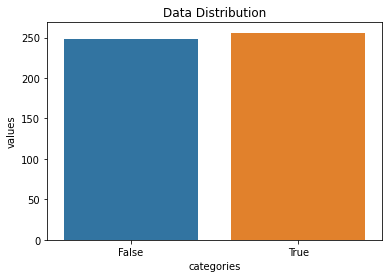

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(df.Label)
plt.title('Data Distribution')
plt.xlabel('categories')
plt.ylabel('values')
plt.show()

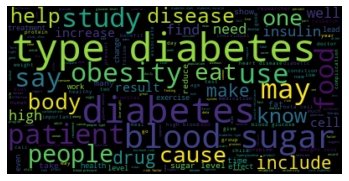

In [ ]:
from wordcloud import WordCloud
wc = WordCloud()
wc.generate(' '.join(df['text_lemmatized']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
#import numpy as np

y_pred = classifier.predict(x_test)


In [ ]:

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[38  3]
 [11 49]]


0.8613861386138614